In [136]:
import pandas as pd
data=pd.read_csv('Table1.csv')

data['age']=2019-data['year']+1


data['citation_per_year']=data['citation']/data['age']

data.head()

,Unnamed: 0,year,tool,paper,citation,index,global,local,technology,read.length,age,citation_per_year
0,1,2012,Batmis,BatMis: a fast algorithm for k-mismatch mapping,29.0,BWT-ST,seed,hamming distance,DNA,No,8,3.625000
1,2,2009,BFAST,BFAST: An Alignment Tool for Large Scale Genom...,596.0,hashing,seed,NaN,DNA,No,11,54.181818
2,3,2011,Bismark,Bismark: a flexible aligner and methylation ca...,1332.0,BWT-FM,Backward Search,backtracking,Bisulfite,No,9,148.000000
3,4,2012,BLASR,Mapping single molecule sequencing reads using...,504.0,BWT-FM,chain of seeds,DP,DNA,Yes,8,63.000000
4,5,2016,NanoBLASTer:,Fast Alignment and Characterization of Oxford ...,5.0,hashing,chain of seeds,DP,DNA,Yes,4,1.250000


In [137]:
class my_colors: 
    red = (0.8,0.,0.13)
    orange = (0.96,0.65,0.51)
    green = (0.02,0.44,0.69)
    blue = (0.57,0.77,1.0)

# Technology 

In [138]:
n=data.shape[0]
n_DNA=data[data.technology == 'DNA'].shape[0]
n_RNA=data[data.technology == 'RNA-Seq'].shape[0]
n_Bisulfite=data[data.technology == 'Bisulfite'].shape[0]
n_other=n-n_DNA-n_RNA-n_Bisulfite

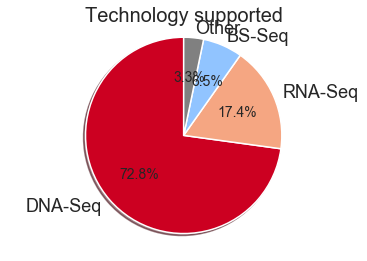

In [139]:
import matplotlib as mpl
import pylab as pl

mpl.rcParams['font.size'] = 14
labels = 'DNA-Seq', 'RNA-Seq', 'BS-Seq', 'Other'
sizes = [n_DNA, n_RNA, n_Bisulfite, n_other]
values = [my_colors.red, my_colors.orange, my_colors.blue, 'grey']
fig1, ax1 = pl.subplots()

ax1.set_title("Technology supported", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
texts[3].set_fontsize(18)
pl.savefig('Figure_1_panels/Domain_pie.png')

In [140]:
n=data.shape[0]
n_DNA=data[data.technology == 'DNA'].shape[0]
n_RNA=data[data.technology == 'RNA-Seq'].shape[0]
n_Bisulfite=data[data.technology == 'Bisulfite'].shape[0]
n_other=n-n_DNA-n_RNA-n_Bisulfite

# Number of citations 

KruskalResult(statistic=0.4031183368870188, pvalue=0.525483196218611)


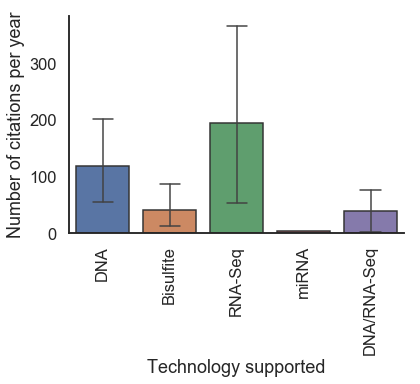

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.barplot(x="technology", y="citation_per_year", data=data,edgecolor=(0.2,0.2,0.2), 
            capsize=0.3,  errwidth=1.5)
g.set(xlabel='Technology supported', ylabel='Number of citations per year')
g=sns.despine()
plt.xticks(rotation=90)
pl.savefig('Figure_1_panels/Citation.per.domain.png', bbox_inches='tight')

p_value = stats.kruskal(data[(data.technology=='DNA')].index.tolist(),
                         data[(data.technology=='RNA-Seq')].index.tolist())
print p_value

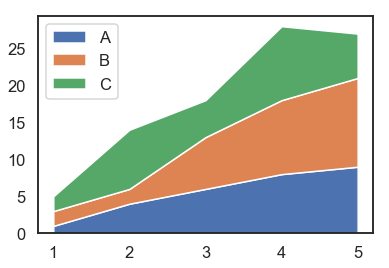

In [142]:
import numpy as np
import matplotlib.pyplot as plt
 
# --- FORMAT 1
 
# Your x and y axis
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
#plt.show()
 


In [146]:


n_tools_DNA=[]
n_tools_RNA=[]
n_tools_BS=[]



for i in range(2001,2019):
    df_temp=data[(data.year == i)]
    n_tools_DNA.append(df_temp[(df_temp.technology == 'DNA')].shape[0])
    n_tools_RNA.append(df_temp[(df_temp.technology == 'RNA-Seq')].shape[0])
    n_tools_BS.append(df_temp[(df_temp.technology == 'Bisulfite')].shape[0])
    
    

from numpy import cumsum, ones


n_tools_DNA_cumsum=cumsum(n_tools_DNA)
n_tools_RNA_cumsum=cumsum(n_tools_RNA)
n_tools_BS_cumsum=cumsum(n_tools_BS)

print n_tools_DNA_cumsum
print n_tools_RNA_cumsum
print n_tools_BS_cumsum


[ 1  2  3  3  5  5  5 12 27 33 39 48 52 58 59 65 65 67]
[ 0  0  0  0  0  0  0  1  2  5  6  8 12 13 15 15 16 16]
[0 0 0 0 0 0 0 0 2 3 4 5 6 6 6 6 6 6]


ValueError: operands could not be broadcast together with shapes (17,) (18,) 

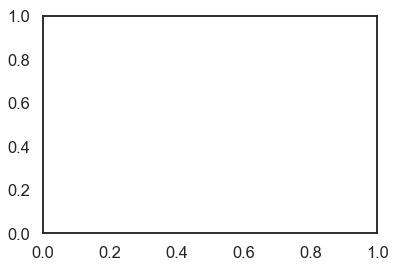

In [147]:
import numpy as np
import matplotlib.pyplot as plt
 
# --- FORMAT 1
 
# Your x and y axis
x=range(2001,2018)
y=[ n_tools_DNA, n_tools_RNA, n_tools_BS ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()
 
    
    
    


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


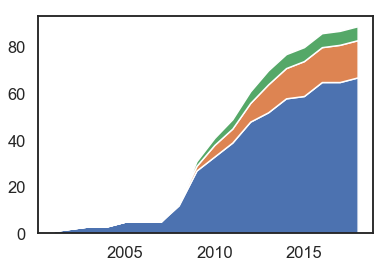

In [153]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
x=range(2001,2019)
y=[ n_tools_DNA_cumsum, n_tools_RNA_cumsum, n_tools_BS_cumsum ]
 
print x    
    
# Plot
plt.stackplot(x,y, labels=['A','B','C'])
#plt.legend(loc='upper left')
plt.show()
